In [1]:
import requests
import json
import pandas as pd

## Download the the data

In [22]:
def get_problem_list(url):
    response = requests.get(url)
    return response.json()

In [45]:
PROBLEMS_URL = 'https://codeforces.com/api/problemset.problems'
json_problem_list = get_problem_list(PROBLEMS_URL)
problems = json_problem_list['result']['problems']
statistics = json_problem_list['result']['problemStatistics']

In [32]:
CONTESTS_URL = 'https://codeforces.com/api/contest.list?gym=false'
contests = get_problem_list(CONTESTS_URL)['result']

## Pandas!

### Problems Dataframe

In [30]:
problems_df = pd.DataFrame(problems)

# drop the points column
problems_df.drop(columns=['points'], inplace=True)

# only keep the rows with type=PROGRAMMING
problems_df = problems_df[problems_df['type'] == 'PROGRAMMING']

# drop the type column now
problems_df.drop(columns=['type'], inplace=True)

display(problems_df)

,contestId,index,name,rating,tags
0,2036,G,Library of Magic,2200.0,"[binary search, constructive algorithms, divid..."
1,2036,F,XORificator 3000,1900.0,"[bitmasks, dp, number theory, two pointers]"
2,2036,E,Reverse the Rivers,1600.0,"[binary search, constructive algorithms, data ..."
3,2036,D,I Love 1543,1300.0,"[brute force, implementation, matrices]"
4,2036,C,Anya and 1100,1100.0,"[brute force, implementation]"
...,...,...,...,...,...
9928,2,B,The least round way,2000.0,"[dp, math]"
9929,2,A,Winner,1500.0,"[hashing, implementation]"
9930,1,C,Ancient Berland Circus,2100.0,"[geometry, math]"
9931,1,B,Spreadsheet,1600.0,"[implementation, math]"


### Stats Dataframe

In [46]:
stats_df = pd.DataFrame(statistics)

display(stats_df)

,contestId,index,solvedCount
0,2036,G,820
1,2036,F,2752
2,2036,E,5575
3,2036,D,10235
4,2036,C,14550
...,...,...,...
9928,2,B,10985
9929,2,A,26597
9930,1,C,5731
9931,1,B,22871


### Contests Dataframe

In [55]:
contests_df = pd.DataFrame(contests)

# drop useless columns
contests_df = contests_df.drop(columns=['type', 'startTimeSeconds', 'relativeTimeSeconds', 'durationSeconds', 'frozen'])

# get the finished contests
contests_df = contests_df[contests_df['phase'] == 'FINISHED']

# drop the phase column now
contests_df = contests_df.drop(columns=['phase'])

# rename the columns
contests_df = contests_df.rename(columns={'id': 'contestId', 'name': 'contestName'})

display(contests_df)

,contestId,contestName
4,2028,Codeforces Round 986 (Div. 2)
5,2029,Refact.ai Match 1 (Codeforces Round 985)
6,2036,Codeforces Round 984 (Div. 3)
7,2032,Codeforces Round 983 (Div. 2)
8,2026,Educational Codeforces Round 171 (Rated for Di...
...,...,...
1927,5,Codeforces Beta Round 5
1928,4,Codeforces Beta Round 4 (Div. 2 Only)
1929,3,Codeforces Beta Round 3
1930,2,Codeforces Beta Round 2


## Join the dataframes

In [60]:
merged_df = pd.merge(problems_df, stats_df, on=['contestId', 'index'], how='inner')
merged_df = pd.merge(merged_df, contests_df, on=['contestId'], how='inner')

# add a url column
merged_df['url'] = merged_df.apply(lambda row: f"https://codeforces.com/problemset/problem/{row['contestId']}/{row['index']}", axis=1)
display(merged_df)

,contestId,index,name,rating,tags,solvedCount,contestName,url
0,2036,G,Library of Magic,2200.0,"[binary search, constructive algorithms, divid...",820,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/G
1,2036,F,XORificator 3000,1900.0,"[bitmasks, dp, number theory, two pointers]",2752,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/F
2,2036,E,Reverse the Rivers,1600.0,"[binary search, constructive algorithms, data ...",5575,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/E
3,2036,D,I Love 1543,1300.0,"[brute force, implementation, matrices]",10235,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/D
4,2036,C,Anya and 1100,1100.0,"[brute force, implementation]",14550,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/C
...,...,...,...,...,...,...,...,...
9928,2,B,The least round way,2000.0,"[dp, math]",10985,Codeforces Beta Round 2,https://codeforces.com/problemset/problem/2/B
9929,2,A,Winner,1500.0,"[hashing, implementation]",26597,Codeforces Beta Round 2,https://codeforces.com/problemset/problem/2/A
9930,1,C,Ancient Berland Circus,2100.0,"[geometry, math]",5731,Codeforces Beta Round 1,https://codeforces.com/problemset/problem/1/C
9931,1,B,Spreadsheet,1600.0,"[implementation, math]",22871,Codeforces Beta Round 1,https://codeforces.com/problemset/problem/1/B


In [77]:
temp_df = merged_df
# only keep the rows that have '(Div. 1)' in the contestName column
temp_df = temp_df[temp_df['contestName'].str.contains('(Div. 1)', regex=False)]
temp_df['contestCount'] = (temp_df['contestId'] != temp_df['contestId'].shift()).cumsum() - 1
temp_df['contestCount'] = temp_df.groupby('contestId')['contestCount'].transform('min')
# temp_df = temp_df.sort_values(by=['index', 'contestId'])
N = 10
temp_df = temp_df[temp_df['contestCount'] < N]
temp_df

C:\Users\ghd\AppData\Local\Temp\ipykernel_26784\1573813674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['contestCount'] = (temp_df['contestId'] != temp_df['contestId'].shift()).cumsum() - 1
C:\Users\ghd\AppData\Local\Temp\ipykernel_26784\1573813674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['contestCount'] = temp_df.groupby('contestId')['contestCount'].transform('min')


,contestId,index,name,rating,tags,solvedCount,contestName,url,contestCount
74,2023,F,Hills and Pits,3500.0,"[data structures, greedy, math, matrices]",52,Codeforces Round 980 (Div. 1),https://codeforces.com/problemset/problem/2023/F,0
75,2023,E,Tree of Life,3300.0,"[dp, greedy, trees]",77,Codeforces Round 980 (Div. 1),https://codeforces.com/problemset/problem/2023/E,0
76,2023,D,Many Games,2900.0,"[brute force, dp, greedy, math, probabilities]",367,Codeforces Round 980 (Div. 1),https://codeforces.com/problemset/problem/2023/D,0
77,2023,C,C+K+S,2400.0,"[constructive algorithms, dfs and similar, gra...",890,Codeforces Round 980 (Div. 1),https://codeforces.com/problemset/problem/2023/C,0
78,2023,B,Skipping,1700.0,"[binary search, dp, graphs, shortest paths]",4641,Codeforces Round 980 (Div. 1),https://codeforces.com/problemset/problem/2023/B,0
...,...,...,...,...,...,...,...,...,...
910,1889,D,Game of Stacks,3000.0,"[brute force, dfs and similar, graphs, impleme...",617,Codeforces Round 906 (Div. 1),https://codeforces.com/problemset/problem/1889/D,9
911,1889,C2,Doremy's Drying Plan (Hard Version),2600.0,"[data structures, dp]",989,Codeforces Round 906 (Div. 1),https://codeforces.com/problemset/problem/1889/C2,9
912,1889,C1,Doremy's Drying Plan (Easy Version),2000.0,"[brute force, data structures, dp, greedy, sor...",3313,Codeforces Round 906 (Div. 1),https://codeforces.com/problemset/problem/1889/C1,9
913,1889,B,Doremy's Connecting Plan,1700.0,"[constructive algorithms, greedy, math, sortings]",7459,Codeforces Round 906 (Div. 1),https://codeforces.com/problemset/problem/1889/B,9


In [142]:
def generate_output(df, division=1, contest_count=100):
    '''
    Generates a list of problems grouped by index in the past {contest_count} contests of the {division} division.
    '''
    df = df.copy()

    df = df[df['contestName'].str.contains(f'(Div. {division})', regex=False)]
    df['contestCount'] = (df['contestId'] != df['contestId'].shift()).cumsum() - 1
    df['contestCount'] = df.groupby('contestId')['contestCount'].transform('min')
    df['contestCount'] += 1
    df = df[df['contestCount'] <= contest_count]
    df = df.sort_values(['index', 'contestId'], ascending=[True, False]).reset_index(drop=True)
    df = df.drop(columns=['contestName', 'contestCount'])
    # df['Problem ID'] = df.apply(lambda x: f'{x["contestId"]}{x["index"]}', axis=1)
    # df = df.drop(columns=['index', 'contestId'])

    # rearrange columns and make the output pretty
    cols = ['contestId', 'index', 'name', 'rating', 'solvedCount', 'url', 'tags']
    df = df[cols]

    # change dtype of rating to int
    # df['rating'] = df['rating'].astype(int)

    # convert tags from list to string
    df['tags'] = df['tags'].apply(lambda x: ', '.join(x))

    df = df.rename(columns={'index':'Index', 'name':'Problem Name', 'rating':'Rating', 'solvedCount':'Solved','problemTitle':'Problem Title', 'tags':'Tags', 'url':'URL', 'contestId':'Contest ID'})
    return df


In [143]:
generate_output(merged_df, division=1, contest_count=3)

,Contest ID,Index,Problem Name,Rating,Solved,URL,Tags
0,2023,A,Concatenation of Arrays,1300.0,11504,https://codeforces.com/problemset/problem/2023/A,"constructive algorithms, greedy, math, sortings"
1,2018,A,Cards Partition,1600.0,9992,https://codeforces.com/problemset/problem/2018/A,"2-sat, brute force, greedy, implementation, math"
2,2006,A,Iris and Game on the Tree,1700.0,6677,https://codeforces.com/problemset/problem/2006/A,"constructive algorithms, dfs and similar, game..."
3,2023,B,Skipping,1700.0,4641,https://codeforces.com/problemset/problem/2023/B,"binary search, dp, graphs, shortest paths"
4,2018,B,Speedbreaker,1900.0,3862,https://codeforces.com/problemset/problem/2018/B,"binary search, data structures, dp, greedy, im..."
5,2006,B,Iris and the Tree,1800.0,3270,https://codeforces.com/problemset/problem/2006/B,"brute force, data structures, dfs and similar,..."
6,2023,C,C+K+S,2400.0,890,https://codeforces.com/problemset/problem/2023/C,"constructive algorithms, dfs and similar, grap..."
7,2018,C,Tree Pruning,1700.0,6052,https://codeforces.com/problemset/problem/2018/C,"brute force, dfs and similar, greedy, sortings..."
8,2006,C,Eri and Expanded Sets,2300.0,1619,https://codeforces.com/problemset/problem/2006/C,"data structures, divide and conquer, math, num..."
9,2023,D,Many Games,2900.0,367,https://codeforces.com/problemset/problem/2023/D,"brute force, dp, greedy, math, probabilities"


In [144]:
def save_output(df, filename):
    # save to csv
    df.to_csv(filename+".csv", index=False)

    # save to markdown
    try:
        df.to_markdown(filename+".md", index=False)
    except:
        print("Markdown not supported try installing tabulate")

    # save to excel
    try:
        df.to_excel(filename+".xlsx", index=False)
    except:
        print("Excel not supported try installing openpyxl")

In [146]:
div1_df = generate_output(merged_df, division=1, contest_count=30)
save_output(div1_df, filename='div1_30')

div1_df = generate_output(merged_df, division=2, contest_count=30)
save_output(div1_df, filename='div2_30')

div1_df = generate_output(merged_df, division=3, contest_count=30)
save_output(div1_df, filename='div3_30')


## Merge Markdown files for the readme.md

In [147]:
files = ["div1_30.md", "div2_30.md", "div3_30.md"]
headers = ["Div. 1", "Div. 2", "Div. 3"]
output_file = "merged_30.md"

# Open the output file in write mode
i = 0
with open(output_file, "w") as outfile:
    for filename in files:
        # Extract the filename without the extension for the header
        header = headers[i]

        # Write the header as H2
        outfile.write(f"## {header}\n\n")

        # Write the content of the current file
        with open(filename, "r") as infile:
            outfile.write(infile.read())
            outfile.write("\n\n")  # Add a blank line between contents of files
        
        i += 1

## find out some relations 

In [148]:
merged_df

,contestId,index,name,rating,tags,solvedCount,contestName,url
0,2036,G,Library of Magic,2200.0,"[binary search, constructive algorithms, divid...",820,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/G
1,2036,F,XORificator 3000,1900.0,"[bitmasks, dp, number theory, two pointers]",2752,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/F
2,2036,E,Reverse the Rivers,1600.0,"[binary search, constructive algorithms, data ...",5575,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/E
3,2036,D,I Love 1543,1300.0,"[brute force, implementation, matrices]",10235,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/D
4,2036,C,Anya and 1100,1100.0,"[brute force, implementation]",14550,Codeforces Round 984 (Div. 3),https://codeforces.com/problemset/problem/2036/C
...,...,...,...,...,...,...,...,...
9928,2,B,The least round way,2000.0,"[dp, math]",10985,Codeforces Beta Round 2,https://codeforces.com/problemset/problem/2/B
9929,2,A,Winner,1500.0,"[hashing, implementation]",26597,Codeforces Beta Round 2,https://codeforces.com/problemset/problem/2/A
9930,1,C,Ancient Berland Circus,2100.0,"[geometry, math]",5731,Codeforces Beta Round 1,https://codeforces.com/problemset/problem/1/C
9931,1,B,Spreadsheet,1600.0,"[implementation, math]",22871,Codeforces Beta Round 1,https://codeforces.com/problemset/problem/1/B


In [170]:
div_1_df_100 = generate_output(merged_df, division=1, contest_count=100)
div_2_df_100 = generate_output(merged_df, division=2, contest_count=100)
div_3_df_100 = generate_output(merged_df, division=3, contest_count=100)

In [171]:
def combine_letters(df):
    temp_df = df.copy()
    temp_df['CombinedIndex'] = temp_df.apply(lambda x: x['Index'][0], axis=1)
    return temp_df

In [172]:
div_1_df_100 = combine_letters(div_1_df_100)
div_2_df_100 = combine_letters(div_2_df_100)
div_3_df_100 = combine_letters(div_3_df_100)

In [174]:
div_3_df_100

,Contest ID,Index,Problem Name,Rating,Solved,URL,Tags,CombinedIndex
0,2036,A,Quintomania,800.0,26965,https://codeforces.com/problemset/problem/2036/A,implementation,A
1,2033,A,Sakurako and Kosuke,800.0,31717,https://codeforces.com/problemset/problem/2033/A,"constructive algorithms, implementation, math",A
2,2014,A,Robin Helps,800.0,36436,https://codeforces.com/problemset/problem/2014/A,"greedy, implementation",A
3,2010,A,Alternating Sum of Numbers,800.0,16504,https://codeforces.com/problemset/problem/2010/A,"brute force, implementation, math",A
4,2008,A,Sakurako's Exam,800.0,34694,https://codeforces.com/problemset/problem/2008/A,"brute force, constructive algorithms, greedy, ...",A
...,...,...,...,...,...,...,...,...
711,1945,H,GCD is Greater,2600.0,669,https://codeforces.com/problemset/problem/1945/H,"brute force, data structures, math, number theory",H
712,1619,H,Permutation and Queries,2400.0,1167,https://codeforces.com/problemset/problem/1619/H,"brute force, data structures, divide and conqu...",H
713,1607,H,Banquet Preparations 2,2200.0,1250,https://codeforces.com/problemset/problem/1607/H,"greedy, sortings, two pointers",H
714,1360,H,Binary Median,2100.0,4594,https://codeforces.com/problemset/problem/1360/H,"binary search, bitmasks, brute force, construc...",H


In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
def plot_rating(df, title, merged=False):
    if merged:
        g = sns.catplot(
            data=df, kind="bar",
            x="CombinedIndex", y="Rating", hue="CombinedIndex", palette="viridis_r",
            capsize=0.1, err_kws={"alpha": .5},
            errorbar="sd", alpha=.99, height=5, aspect=1.2,
        )
    else:
        g = sns.catplot(
            data=df, kind="bar",
            x="Index", y="Rating", hue="CombinedIndex", palette="viridis_r",
            capsize=0.1, err_kws={"alpha": .5},
            errorbar="sd", alpha=.99, height=5, aspect=1.5,
        )
    g.despine(left=True)
    g.set_axis_labels("", "Rating")
    import numpy as np
    plt.yticks(np.arange(0, 3600, step=200))
    if not merged:
        g.legend.remove()
    plt.title(title)
    plt.show()

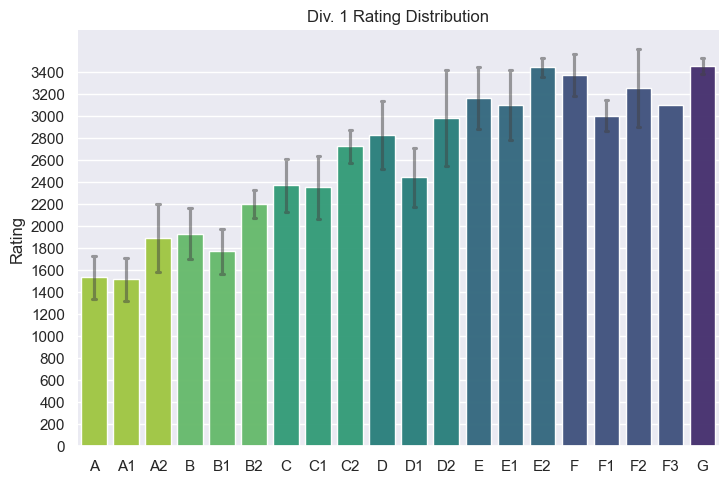

In [298]:
plot_rating(div_1_df_100, "Div. 1 Rating Distribution", merged=False)
# plot_rating(div_2_df_100, "Div. 2 Rating Distribution", merged=False)
# plot_rating(div_3_df_100, "Div. 3 Rating Distribution", merged=False)

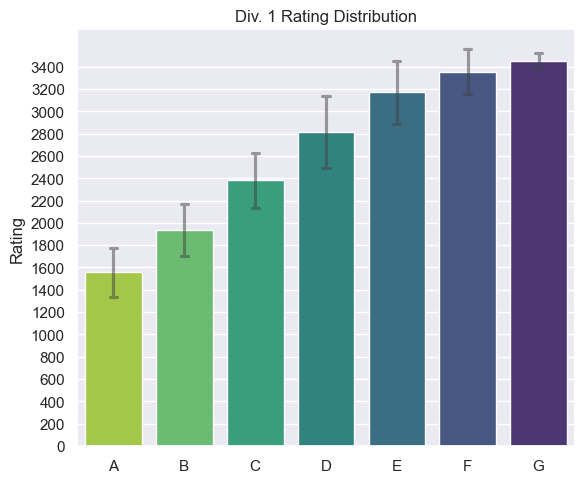

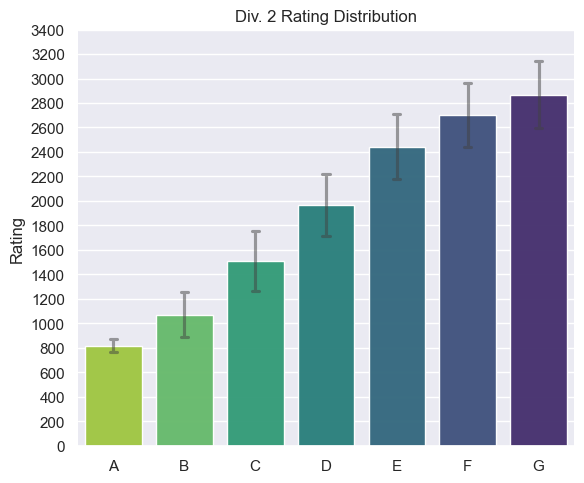

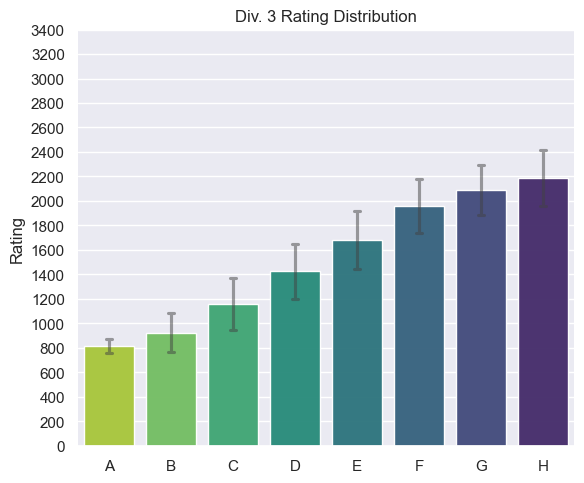

In [299]:
plot_rating(div_1_df_100, "Div. 1 Rating Distribution", merged=True)
plot_rating(div_2_df_100, "Div. 2 Rating Distribution", merged=True)
plot_rating(div_3_df_100, "Div. 3 Rating Distribution", merged=True)

In [260]:
div_1_df_100["division"] = "Div. 1"
div_2_df_100["division"] = "Div. 2"
div_3_df_100["division"] = "Div. 3"
combined_df_100 = pd.concat([div_1_df_100, div_2_df_100, div_3_df_100], axis=0)

In [261]:
# remove questions with CombinedIndex G
combined_df_100 = combined_df_100[combined_df_100['CombinedIndex'] != 'H']

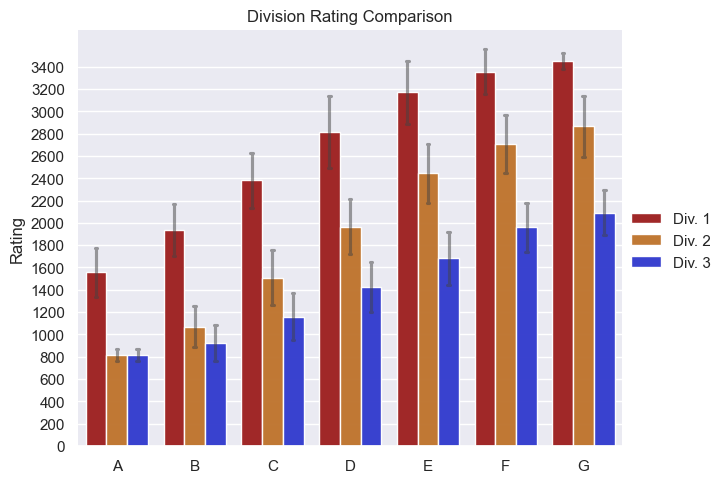

In [262]:
def plot_rating_div_comparison(df, title):

    custom_palette = ["#B31111FF", "#D8761AFF", "#1D2AE9FF"]

    g = sns.catplot(
        data=df, kind="bar",
        x="CombinedIndex", y="Rating", hue="division", palette=custom_palette,
        capsize=0.1,
        err_kws={"alpha": 0.5},
        errorbar="sd", alpha=.99, height=5, aspect=1.3,
    )
    g.despine(left=True)
    g.set_axis_labels("", "Rating")
    g.legend.set_title("")
    import numpy as np
    plt.yticks(np.arange(0, 3600, step=200))
    plt.title(title)
    plt.show()


plot_rating_div_comparison(combined_df_100.reset_index(), "Division Rating Comparison")